You’ll need 4 variations:
* Custom networks (at least 3) to show that you explored hyperparameters a bit.
* Transfer learning (at least 2, e.g., VGG, ResNet).
* Data augmentation with custom network (only 1 network is enough, the one that previously gave the best results).
* Data augmentation with transfer learning (the above 2+ networks).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
import os
from PIL import Image
import imageio

# Import Data

In [2]:


path = kagglehub.dataset_download("luisolazo/tomato-diseases")


print("Path to dataset files:", path)


100%|██████████| 411M/411M [00:04<00:00, 90.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/luisolazo/tomato-diseases/versions/3


In [3]:
dataset_path = path

In [4]:

print(os.listdir(dataset_path))

['train', 'test']


In [5]:
labels=os.listdir(dataset_path+'/train')
print(labels)

['healthy', 'bacterial_spot', 'yellow_leaf_curl_virus', 'early_blight', 'twospotted_spider_mite', 'septoria_leaf_spot', 'mosaic_virus', 'target_spot', 'late_blight', 'leaf_mold']


# Data Preprocessing

In [6]:
test_labels=os.listdir(dataset_path+'/test')

In [7]:
for label in labels:
  print(label,len(os.listdir(dataset_path+'/train/'+label)))

healthy 1883
bacterial_spot 1679
yellow_leaf_curl_virus 3595
early_blight 2177
twospotted_spider_mite 1232
septoria_leaf_spot 1327
mosaic_virus 1197
target_spot 1110
late_blight 2093
leaf_mold 1460


In [8]:
"""
  for label in test_labels:
    bad_images_count = 0
    label_path = os.path.join(dataset_path, 'valid', label)

    for filename in os.listdir(label_path):
        file_path = os.path.join(label_path, filename)

        try:
            # Check if the file is an image
            image = plt.imread(file_path)

            # If image has an alpha channel (transparency)
            if image.shape[-1] == 4:
                bad_images_count += 1
                img = Image.open(file_path).convert("RGB")  # Convert to RGB
                img.save(file_path)  # Overwrite with RGB version

            # Check if the image is NOT PNG
            if not filename.lower().endswith('.png'):
                bad_images_count += 1
                img = Image.open(file_path).convert("RGBA")  # Convert to PNG format
                new_file_path = os.path.splitext(file_path)[0] + ".png"
                img.save(new_file_path, "PNG")

                # Delete the old non-PNG file
                os.remove(file_path)

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    print(label, bad_images_count)
"""

'\n  for label in test_labels:\n    bad_images_count = 0\n    label_path = os.path.join(dataset_path, \'valid\', label)\n\n    for filename in os.listdir(label_path):\n        file_path = os.path.join(label_path, filename)\n\n        try:\n            # Check if the file is an image\n            image = plt.imread(file_path)\n\n            # If image has an alpha channel (transparency)\n            if image.shape[-1] == 4:\n                bad_images_count += 1\n                img = Image.open(file_path).convert("RGB")  # Convert to RGB\n                img.save(file_path)  # Overwrite with RGB version\n\n            # Check if the image is NOT PNG\n            if not filename.lower().endswith(\'.png\'):\n                bad_images_count += 1\n                img = Image.open(file_path).convert("RGBA")  # Convert to PNG format\n                new_file_path = os.path.splitext(file_path)[0] + ".png"\n                img.save(new_file_path, "PNG")\n\n                # Delete the old non

In [9]:
"""
# Creates Images In My Dataset
def image_generator(nimages_per_file,labels):

  random_rotation=tf.keras.layers.RandomRotation(factor=0.2)


  for label in labels:
    i=0
    image_number=len(os.listdir(dataset_path+'/train/'+label))

    while image_number<nimages_per_file:
      path_of=os.listdir(dataset_path+'/train/'+label)
      image=plt.imread(dataset_path+'/train/'+label+'/'+path_of[np.random.randint(0,image_number)])
      image_number+=1



      rotated_image=random_rotation(image)

      transformed_image = Image.fromarray(rotated_image)
      new_image_path = os.path.join(dataset_path + '/train/' + label, f"transformed_{image_number}.jpg")

      transformed_image.save(new_image_path)

      print(f"Saved transformed image: {new_image_path}")
"""






'\n# Creates Images In My Dataset\ndef image_generator(nimages_per_file,labels):\n\n  random_rotation=tf.keras.layers.RandomRotation(factor=0.2)\n\n\n  for label in labels:\n    i=0\n    image_number=len(os.listdir(dataset_path+\'/train/\'+label))\n\n    while image_number<nimages_per_file:\n      path_of=os.listdir(dataset_path+\'/train/\'+label)\n      image=plt.imread(dataset_path+\'/train/\'+label+\'/\'+path_of[np.random.randint(0,image_number)])\n      image_number+=1\n\n\n\n      rotated_image=random_rotation(image)\n\n      transformed_image = Image.fromarray(rotated_image)\n      new_image_path = os.path.join(dataset_path + \'/train/\' + label, f"transformed_{image_number}.jpg")\n\n      transformed_image.save(new_image_path)\n\n      print(f"Saved transformed image: {new_image_path}")\n'

In [10]:
#image_examplee=image_generator(nimages_per_file=3595,labels=labels)



In [11]:
for label in labels:
  print(f"The {label} has, {len(os.listdir(dataset_path+'/train/'+label))} samples in the train folder")

The healthy has, 1883 samples in the train folder
The bacterial_spot has, 1679 samples in the train folder
The yellow_leaf_curl_virus has, 3595 samples in the train folder
The early_blight has, 2177 samples in the train folder
The twospotted_spider_mite has, 1232 samples in the train folder
The septoria_leaf_spot has, 1327 samples in the train folder
The mosaic_virus has, 1197 samples in the train folder
The target_spot has, 1110 samples in the train folder
The late_blight has, 2093 samples in the train folder
The leaf_mold has, 1460 samples in the train folder


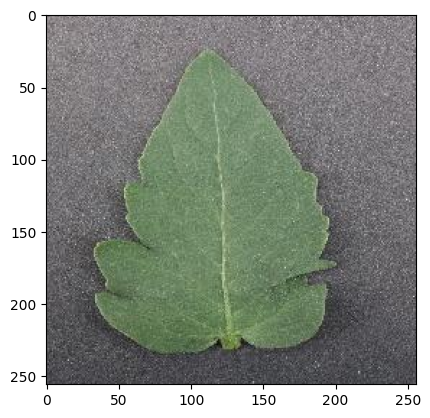

In [12]:
path_of=os.listdir(dataset_path+'/train/healthy')
image=plt.imread(dataset_path+'/train/healthy/'+path_of[1])
plt.imshow(image)

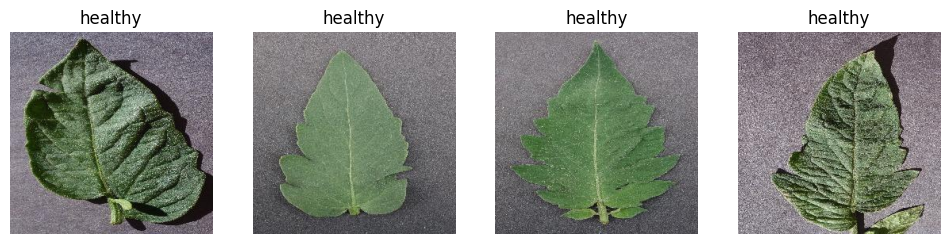

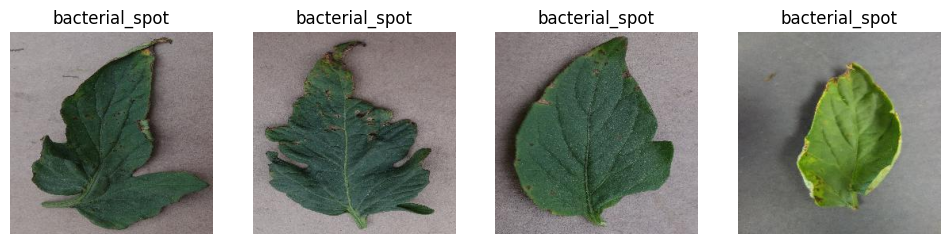

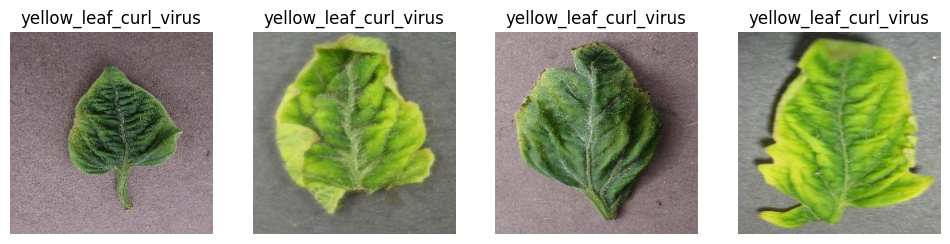

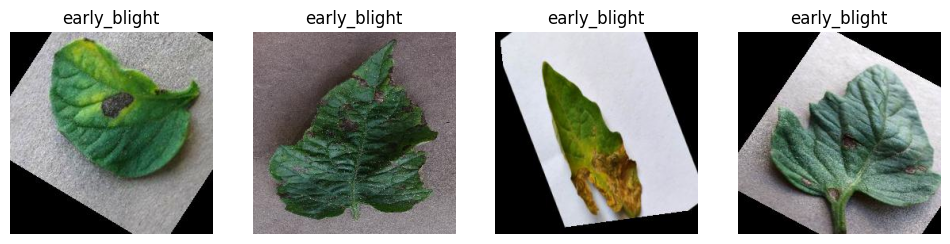

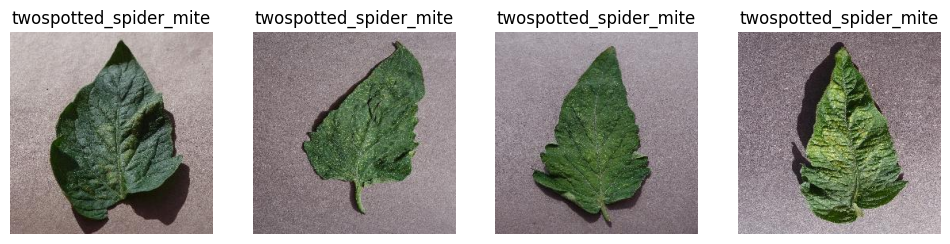

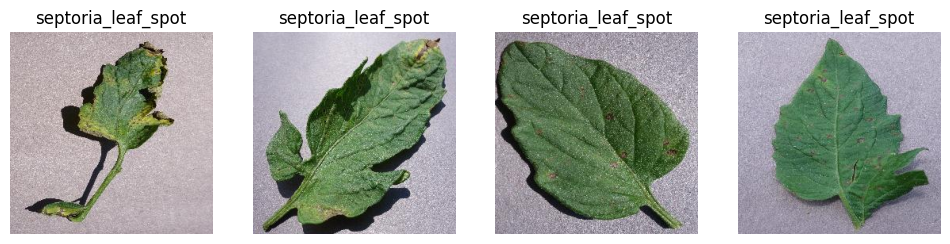

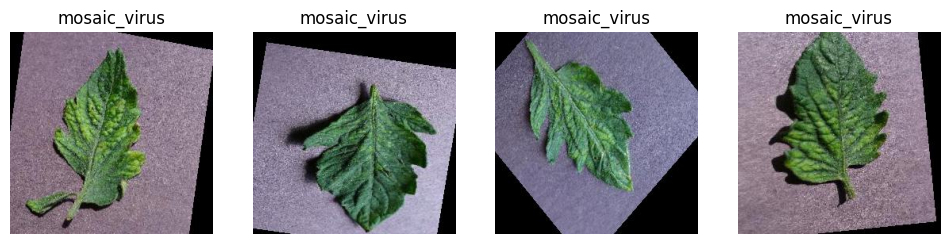

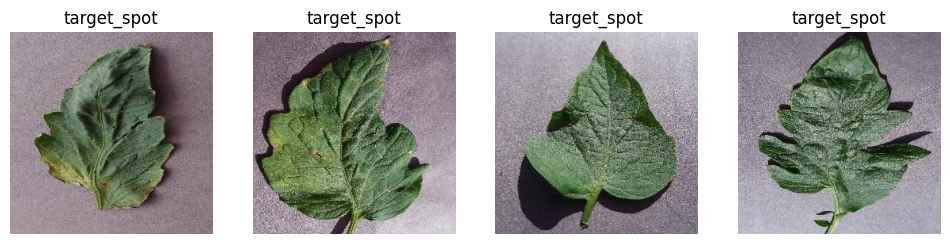

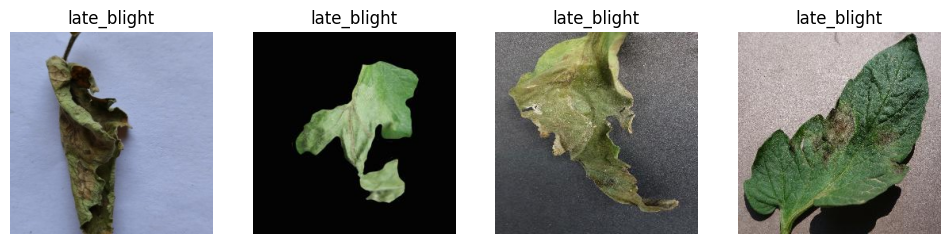

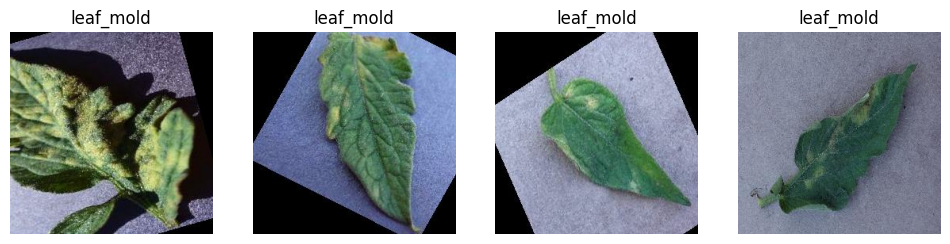

In [13]:
for label in labels:
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Create 1 row, 4 columns of subplots

    path_of_images = os.listdir(os.path.join(dataset_path, 'train', label))[:4]  # Get first 4 images

    for i, image_name in enumerate(path_of_images):
        image_path = os.path.join(dataset_path, 'train', label, image_name)
        image = plt.imread(image_path)

        axes[i].imshow(image)
        axes[i].axis('off')  # Hide axes
        axes[i].set_title(label)  # Set title with label name

    plt.show()  # Show th

In [14]:
train_data,validation_data=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path+'/train',
                                                               image_size=(200,200),batch_size=32,
                                                               label_mode='categorical',shuffle=True,
                                                              validation_split=0.2,subset='both',seed=1)

Found 17753 files belonging to 10 classes.
Using 14203 files for training.
Using 3550 files for validation.


In [15]:
train_data=train_data.map(lambda x,y:(x/255,y) )
validation_data=validation_data.map(lambda x,y:(x/255,y) )

In [16]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path+'/test',
                                                              image_size=(200,200),batch_size=32,
                                                              label_mode='categorical')

Found 4440 files belonging to 10 classes.


In [17]:
test_data=test_data.map(lambda x,y:(x/255,y))

In [18]:
for image,target in train_data.take(1):
  print(target)

tf.Tensor(
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

# Train Our Models

# Model_1

In [19]:
from functools import partial
Conv2d=partial(tf.keras.layers.Conv2D,kernel_size=3,padding='same',strides=1 )

@tf.keras.utils.register_keras_serializable()
class Inception_mode(tf.keras.layers.Layer):
  def __init__ (self,filters,strides=1,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.filters=filters
    self.strides=strides
    self.activation=activation
    self.concat = tf.keras.layers.Concatenate(axis=-1)

    self.inception_layers_1=[tf.keras.layers.MaxPooling2D(pool_size=2,strides=strides,padding='same'),
                             Conv2d(filters=filters,activation=activation),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters)]

    self.inception_layers_2=[tf.keras.layers.AveragePooling2D(pool_size=2,strides=strides,padding='same'),
                             Conv2d(filters=filters),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters)]

    self.inception_layers_3=[Conv2d(filters=filters,strides=strides,activation=activation,kernel_size=1),
                             tf.keras.layers.BatchNormalization(),
                             Conv2d(filters=filters,kernel_size=1)]



  def build(self, input_shape):
      input_shape = list(input_shape)
      input_shape[0] = 1
      input_shape = tuple(input_shape)

      dummy = tf.keras.backend.zeros(input_shape)
      _ = self.call(dummy)
      super().build(input_shape)


  def call(self, inputs):
      def apply_layers(x, layer_list):
          for layer in layer_list:
              x = layer(x)
          return x

      x1 = apply_layers(inputs, self.inception_layers_1)
      x2 = apply_layers(inputs, self.inception_layers_2)
      x3 = apply_layers(inputs, self.inception_layers_3)

      return self.concat([x1, x2, x3])

  def get_config(self):
    config = super().get_config()
    config.update({
        "filters": self.filters,
        "strides": self.strides,
        "activation": self.activation
    })
    return config

In [ ]:
inputs=tf.keras.layers.Input(shape=(255,255,3))
max_1=tf.keras.layers.MaxPool2D(pool_size=(3,3))(inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu')(max_1)
layer_3=Inception_mode(filters=32)(layer_2)
layer_4=tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu')(layer_3)
layer_5=Inception_mode(filters=64)(layer_4)
concatlayer_1=tf.keras.layers.Concatenate(axis=-1)([layer_2,layer_5])
normal=tf.keras.layers.BatchNormalization()(concatlayer_1)
layer_6=tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu')(normal)
layer_7=Inception_mode(filters=128)(layer_6)
layer_8=tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')(layer_7)
layer_9=Inception_mode(filters=256)(layer_8)
concatlayer_2=tf.keras.layers.Concatenate(axis=-1)([layer_6,layer_9])
layer_10=tf.keras.layers.GlobalAveragePooling2D()(concatlayer_2)
outputs=tf.keras.layers.Dense(10,activation='softmax')(layer_10)

model_1=tf.keras.Model(inputs=inputs,outputs=outputs)








model_1.summary()
model_1.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 255, 255,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 85, 85, 3) │          0 │ input_layer[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 85, 85,    │        416 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode      │ (None, 85, 85,    │     39,488 │ conv2d[0][0]      │
│ (Inception_mode)    │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 85, 85,    │     24,640 │ inception_mode[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_1    │ (None, 85, 85,    │    156,800 │ conv2d_7[0][0]    │
│ (Inception_mode)    │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 85, 85,    │          0 │ conv2d[0][0],     │
│ (Concatenate)       │ 224)              │            │ inception_mode_1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 85, 85,    │        896 │ concatenate_2[0]… │
│ (BatchNormalizatio… │ 224)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 85, 85,    │    258,176 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_2    │ (None, 85, 85,    │    624,896 │ conv2d_14[0][0]   │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 85, 85,    │    884,992 │ inception_mode_2… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_3    │ (None, 85, 85,    │  2,494,976 │ conv2d_21[0][0]   │
│ (Inception_mode)    │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 85, 85,    │          0 │ conv2d_14[0][0],  │
│ (Concatenate)       │ 896)              │            │ inception_mode_3… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 896)       │          0 │ concatenate_5[0]… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │      8,970 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,494,250 (17.14 MB)

 Trainable params: 4,490,922 (17.13 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [ ]:
import math
def exponential_decay_lr(epoch):
    initial_lr = 0.001
    k = math.log(10) / 10  # ≈ 0.23026
    return initial_lr * math.exp(-k * epoch)


def lr_schedule_exp(epoch):
  if epoch<15:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return 0.0001/5
schedule_1=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_1=tf.keras.callbacks.ModelCheckpoint('model_1.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history_1=model_1.fit(train_data,epochs=20,validation_data=(validation_data),callbacks=[schedule_1,check_point_1])

Epoch 1/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6614 - loss: 1.0020
Epoch 1: val_accuracy improved from -inf to 0.23437, saving model to model_1.keras
444/444 ━━━━━━━━━━━━━━━━━━━━ 634s 1s/step - accuracy: 0.6616 - loss: 1.0013 - val_accuracy: 0.2344 - val_loss: 5.9010 - learning_rate: 0.0050
Epoch 2/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8434 - loss: 0.4585
Epoch 2: val_accuracy improved from 0.23437 to 0.48310, saving model to model_1.keras
444/444 ━━━━━━━━━━━━━━━━━━━━ 495s 1s/step - accuracy: 0.8434 - loss: 0.4585 - val_accuracy: 0.4831 - val_loss: 3.2495 - learning_rate: 0.0045
Epoch 3/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8833 - loss: 0.3315
Epoch 3: val_accuracy did not improve from 0.48310
444/444 ━━━━━━━━━━━━━━━━━━━━ 505s 1s/step - accuracy: 0.8833 - loss: 0.3315 - val_accuracy: 0.2211 - val_loss: 8.0508 - learning_rate: 0.0041
Epoch 4/20
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9104 - loss: 0.2621
Epoch 4: val_a

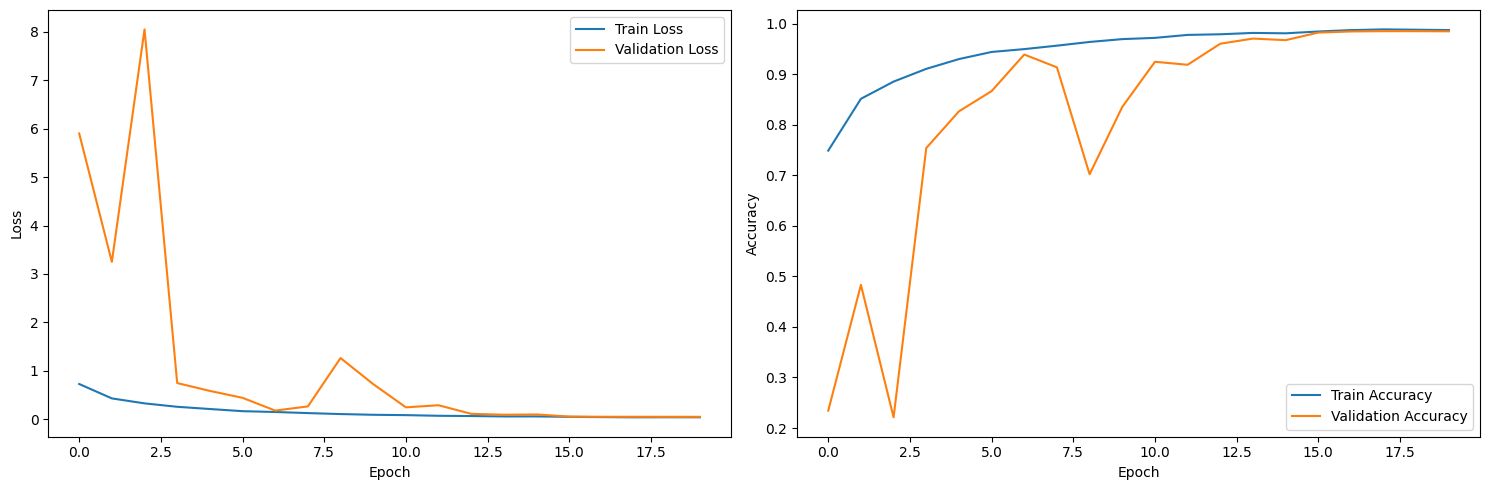

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history_1.history['loss'],label='Train Loss')
axes[0].plot(history_1.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history_1.history['accuracy'],label='Train Accuracy')
axes[1].plot(history_1.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model_1.evaluate(test_data)

139/139 ━━━━━━━━━━━━━━━━━━━━ 70s 504ms/step - accuracy: 0.9852 - loss: 0.0461


[0.04560117796063423, 0.9851351380348206]

In [ ]:
model_1.save('model_1_Tomato_(98.52).keras')

# Model_2

In [21]:
@tf.keras.utils.register_keras_serializable()
class Recalibration_block(tf.keras.layers.Layer):
  def __init__(self,filters,activation='relu',**kwargs):
    super().__init__(**kwargs)
    self.filters=filters
    self.activation=activation

    self.block=[tf.keras.layers.GlobalAveragePooling2D(),
                tf.keras.layers.Dense(units=filters//16,activation=activation),
                tf.keras.layers.Dense(units=filters,activation='sigmoid'),
                tf.keras.layers.Reshape((1,1,filters))]

  def call(self,inputs):
    x=inputs
    for layer in self.block:
      x=layer(x)
    out=tf.multiply(inputs,x)
    return out

  def get_config(self):
    config = super().get_config()
    config.update({
        "filters": self.filters,
        "activation": self.activation
    })
    return config



inputs=tf.keras.layers.Input(shape=(255,255,3))
max_1=tf.keras.layers.MaxPool2D(pool_size=(3,3))(inputs)
layer_2=tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu')(max_1)
layer_3=Inception_mode(filters=32)(layer_2)
layer_4=tf.keras.layers.SeparableConv2D(filters=64,kernel_size=2,padding='same',activation='relu')(layer_3)
layer_5=Inception_mode(filters=64)(layer_4)
concatlayer_1=tf.keras.layers.Concatenate(axis=-1)([layer_2,layer_5])
normal=tf.keras.layers.BatchNormalization()(concatlayer_1)
layer_6=tf.keras.layers.SeparableConv2D(filters=128,kernel_size=3,padding='same',activation='relu')(normal)
layer_7=Inception_mode(filters=128)(layer_6)
layer_8=tf.keras.layers.SeparableConv2D(filters=256,kernel_size=3,padding='same',activation='relu')(layer_7)
layer_9=Inception_mode(filters=256)(layer_8)
concatlayer_2=tf.keras.layers.Concatenate(axis=-1)([layer_6,layer_9])
layer_10=tf.keras.layers.GlobalAveragePooling2D()(concatlayer_2)
outputs=tf.keras.layers.Dense(10,activation='softmax')(layer_10)

model_2=tf.keras.Model(inputs=inputs,outputs=outputs)

model_2.summary()
model_2.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 100, 100,  │          0 │ input_layer_1[0]… │
│ (MaxPooling2D)      │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 100, 100,  │        416 │ max_pooling2d_5[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_4    │ (None, 100, 100,  │     39,488 │ conv2d_25[0][0]   │
│ (Inception_mode)    │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_3  │ (None, 100, 100,  │      6,592 │ inception_mode_4… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_5    │ (None, 100, 100,  │    156,800 │ separable_conv2d… │
│ (Inception_mode)    │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 100, 100,  │          0 │ conv2d_25[0][0],  │
│ (Concatenate)       │ 224)              │            │ inception_mode_5… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 100,  │        896 │ concatenate_8[0]… │
│ (BatchNormalizatio… │ 224)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_4  │ (None, 100, 100,  │     30,816 │ batch_normalizat… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_6    │ (None, 100, 100,  │    624,896 │ separable_conv2d… │
│ (Inception_mode)    │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_5  │ (None, 100, 100,  │    102,016 │ inception_mode_6… │
│ (SeparableConv2D)   │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ inception_mode_7    │ (None, 100, 100,  │  2,494,976 │ separable_conv2d… │
│ (Inception_mode)    │ 768)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 100, 100,  │          0 │ separable_conv2d… │
│ (Concatenate)       │ 896)              │            │ inception_mode_7… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 896)       │          0 │ concatenate_11[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      8,970 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,465,866 (13.22 MB)

 Trainable params: 3,462,538 (13.21 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [22]:
def lr_schedule_exp(epoch):
  if epoch<10:
    return float(tf.exp(-epoch/10.)*0.01)/4
  else:
    return 0.0001/6
schedule_1=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
check_point_1=tf.keras.callbacks.ModelCheckpoint('model_2.keras',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history_2=model_2.fit(train_data,epochs=15,validation_data=(validation_data),callbacks=[schedule_1,check_point_1])

Epoch 1/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6493 - loss: 1.0496
Epoch 1: val_accuracy improved from -inf to 0.40028, saving model to model_2.keras
444/444 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.6495 - loss: 1.0490 - val_accuracy: 0.4003 - val_loss: 2.0421 - learning_rate: 0.0025
Epoch 2/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8444 - loss: 0.4661
Epoch 2: val_accuracy improved from 0.40028 to 0.61465, saving model to model_2.keras
444/444 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.8444 - loss: 0.4661 - val_accuracy: 0.6146 - val_loss: 1.6089 - learning_rate: 0.0023
Epoch 3/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8759 - loss: 0.3577
Epoch 3: val_accuracy did not improve from 0.61465
444/444 ━━━━━━━━━━━━━━━━━━━━ 572s 1s/step - accuracy: 0.8760 - loss: 0.3576 - val_accuracy: 0.5065 - val_loss: 2.0565 - learning_rate: 0.0020
Epoch 4/15
444/444 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8955 - loss: 0.3016
Epoch 4: val_a

# Model_3

# Transfer Learning Models

Model_1

In [ ]:
from tensorflow import keras

# Load a pretrained ResNet model
model = keras.applications.ResNet50(weights="imagenet", include_top=False, input_shape=(255, 255, 3))

# Add custom layers
x = keras.layers.GlobalAveragePooling2D()(model.output)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.3)(x)
output = keras.layers.Dense(10, activation="softmax")(x)
Res_model = keras.Model(inputs=model.input, outputs=output)


In [ ]:
Res_model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=(1e-2)/2,nesterov=True),metrics=['accuracy'])

In [ ]:
Res_model.fit(train_data,epochs=20,validation_data=test_data)

Epoch 1/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 232s 376ms/step - accuracy: 0.7004 - loss: 0.9382 - val_accuracy: 0.0995 - val_loss: 4.3448
Epoch 2/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 185s 332ms/step - accuracy: 0.9604 - loss: 0.1222 - val_accuracy: 0.9124 - val_loss: 0.2721
Epoch 3/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 202s 333ms/step - accuracy: 0.9813 - loss: 0.0622 - val_accuracy: 0.9795 - val_loss: 0.0572
Epoch 4/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 210s 347ms/step - accuracy: 0.9908 - loss: 0.0356 - val_accuracy: 0.9824 - val_loss: 0.0550
Epoch 5/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 195s 334ms/step - accuracy: 0.9951 - loss: 0.0239 - val_accuracy: 0.9849 - val_loss: 0.0429
Epoch 6/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 187s 337ms/step - accuracy: 0.9962 - loss: 0.0162 - val_accuracy: 0.9885 - val_loss: 0.0426
Epoch 7/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 208s 348ms/step - accuracy: 0.9965 - loss: 0.0155 - val_accuracy: 0.9887 - val_loss: 0.0395
Epoch 8/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 194s 334ms/step - accuracy: 0.9985 -

In [ ]:
Res_model.evaluate(test_data)

In [ ]:
Res_history=pd.DataFrame(Res_model.history.history)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].plot(Res_history[['loss','val_loss']],marker='*')
axes[1].plot(Res_history[['accuracy','val_accuracy']],marker='*')
axes[0].legend(['loss','val_loss'])
axes[1].legend(['accuracy','val_accuracy'])
axes[0].grid()
axes[1].grid()

In [ ]:
from functools import partial
Conv2d=partial(tf.keras.layers.Conv2D,kernel_size=2,padding='valid',strides=3,activation='relu',kernel_initializer='he_normal' )

In [ ]:
input=tf.keras.layers.Input(shape=(255,255,3))

conv_1=Conv2d(filters=66)(input)
batch_1=tf.keras.layers.BatchNormalization()(conv_1)
max_1=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_1)
conv_1_2=Conv2d(filters=346)(max_1)

conv_2=Conv2d(filters=126)(input)
batch_2=tf.keras.layers.BatchNormalization()(conv_2)
max_2=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_2)
conv_2_2=Conv2d(filters=346)(max_2)

conv_3=Conv2d(filters=346)(input)
batch_3=tf.keras.layers.BatchNormalization()(conv_3)
max_3=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_3)
conv_3_2=Conv2d(filters=666)(max_3)

conv_4=Conv2d(filters=666)(input)
batch_4=tf.keras.layers.BatchNormalization()(conv_4)
max_4=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_4)
conv_4_2=Conv2d(filters=666)(max_4)

class MY_LAYER(tf.keras.layers.Layer):
  def _init_(self,**kwargs):
    super().__init__(**kwargs)

  def call(self,layer_1,layer_2):
    return tf.subtract(self.layer_1,self.layer_2)

LAYER_1=MY_LAYER()([conv_1_2,conv_2_2])
LAYER_2=MY_LAYER()([conv_3_2,conv_4_2])


concat_layer=tf.keras.layers.Concatenate()([LAYER_1,LAYER_2])
conv_5=Conv2d(filters=1266)(concat_layer)
batch_5=tf.keras.layers.BatchNormalization()(conv_5)
max_5=tf.keras.layers.MaxPool2D(pool_size=(2,2))(batch_5)
flatten=tf.keras.layers.Flatten()(max_5)
dense_1=tf.keras.layers.Dense(units=100,activation='relu',kernel_initializer='he_normal')(flatten)
drop_1=tf.keras.layers.Dropout(0.3)(dense_1)
dense_2=tf.keras.layers.Dense(units=70,activation='relu',kernel_initializer='he_normal')(drop_1)
drop_2=tf.keras.layers.Dropout(0.2)(dense_2)
dense_3=tf.keras.layers.Dense(units=30,activation='relu',kernel_initializer='he_normal')(dense_2)
output=tf.keras.layers.Dense(units=10,activation='softmax')(dense_3)

model_2=tf.keras.Model(inputs=input,outputs=output)
model_2.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])





TypeError: missing a required argument: 'layer_2'

In [ ]:
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 255, 255, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 85, 85, 66)     │            858 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 85, 85, 126)    │          1,638 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 85, 85, 346)    │          4,498 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 85, 85, 666)    │          8,658 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 85, 85, 66)     │            264 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 85, 85, 126)    │            504 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 85, 85, 346)    │          1,384 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 85, 85, 666)    │          2,664 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 42, 42, 66)     │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 42, 42, 126)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 42, 42, 346)    │              0 │ batch_normalization_2… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 42, 42, 666)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 42, 42, 1204)   │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ max_pooling2d_1[0][0], │
│                           │                        │                │ max_pooling2d_2[0][0], │
│                           │                        │                │ max_pooling2d_3[0][0]  │
├──────────────────────

 Total params: 12,336,864 (47.06 MB)

 Trainable params: 12,331,924 (47.04 MB)

 Non-trainable params: 4,940 (19.30 KB)

In [ ]:
model_2.fit(train_data,epochs=30,validation_data=test_data,callbacks=[early_stop,schedule])

Epoch 1/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 151s 241ms/step - accuracy: 0.3814 - loss: 2.3274 - val_accuracy: 0.5829 - val_loss: 1.3022 - learning_rate: 5.0000e-04
Epoch 2/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 121s 218ms/step - accuracy: 0.5641 - loss: 1.2635 - val_accuracy: 0.7016 - val_loss: 0.9117 - learning_rate: 5.0000e-04
Epoch 3/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 117s 211ms/step - accuracy: 0.6571 - loss: 1.0028 - val_accuracy: 0.7932 - val_loss: 0.6744 - learning_rate: 5.0000e-04
Epoch 4/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 121s 217ms/step - accuracy: 0.6927 - loss: 0.8899 - val_accuracy: 0.7779 - val_loss: 0.7166 - learning_rate: 5.0000e-04
Epoch 5/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 117s 211ms/step - accuracy: 0.7206 - loss: 0.8114 - val_accuracy: 0.8622 - val_loss: 0.5030 - learning_rate: 5.0000e-04
Epoch 6/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 146s 217ms/step - accuracy: 0.7558 - loss: 0.7235 - val_accuracy: 0.8617 - val_loss: 0.5037 - learning_rate: 5.0000e-04
Epoch 7/30
555/555 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

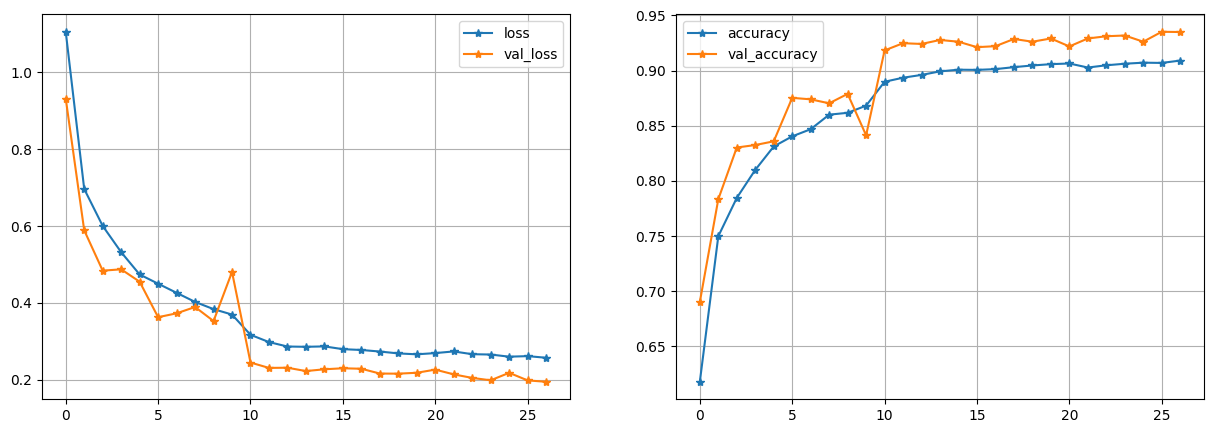

In [ ]:
history=pd.DataFrame(model_2.history.history)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].plot(history[['loss','val_loss']],marker='*')
axes[1].plot(history[['accuracy','val_accuracy']],marker='*')
axes[0].legend(['loss','val_loss'])
axes[1].legend(['accuracy','val_accuracy'])
axes[0].grid()
axes[1].grid()

In [ ]:
input=tf.keras.layers.Input(shape=(255,255,3))

